# The Economic Costs of Conflict
### Abadie & Gardeazabel

This notebook reproduces the weights from the 2003 paper "The Economic Costs of Conflict: A Case Study of the Basque Country" by Alberto Abadie and Javier Gardeazabal. The study data is contained in the file `../data/basque.csv` (more detailed information on this dataset is available on page 2 of the ``R`` ``synth`` package documentation [here](https://cran.r-project.org/web/packages/Synth/Synth.pdf)).

We prepare the study data using a `Dataprep` object that describes all the details needed to define the synthetic control study. This works similarly to the `dataprep` method in the `R` package `synth`.

(For an explanation of each of the `Dataprep` arguments, see the package [documentation](https://sdfordham.github.io/pysyncon/dataprep.html#pysyncon.Dataprep)).

In [1]:
import sys
sys.path.insert(0, '../src')
import nz_util
from pysyncon import Dataprep, Synth
from pysyncon.utils import PlaceboTest

Sectoral shares of GDP: agriculture, administration, construction, education, financial, food, health, information, manufacturing, occupation, professional, public services, rental, retail, transport, wholesale, and others (averaged between 2006 and 2010)


Percentage of the population with a tertiary educational level (averaged between 2007 and 2010)

In [2]:

import importlib
importlib.reload(nz_util)

df = nz_util.clean_data_for_synthetic_control()
df = df[df['Year'] < 2023]
df['Tertiary Share'] = df['Tertiary'] / df['Population']
dataprep = Dataprep(
    foo=df,
    predictors=nz_util.SECTORIAL_GDP_VARIABLES,
    predictors_op="mean",
    time_predictors_prior=range(2000, 2009),
    special_predictors=[
        ("GDP per capita", range(2006, 2009), "mean"),
        ("Tertiary Share", range(2007, 2009), "mean")
    ],
    dependent="GDP per capita",
    unit_variable="Region",
    time_variable="Year",
    treatment_identifier="Canterbury",
    controls_identifier=[
    "Auckland",
    "Bay of Plenty",
    "Gisborne",
    "Hawke's Bay",
    "Manawatu-Whanganui",
    "Marlborough",
    "Northland",
    "Otago",
    "Southland",
    "Taranaki",
    "Tasman/Nelson",
    "Waikato",
    "Wellington",
    "West Coast"
],
    time_optimize_ssr=range(2000, 2010),
)

print(dataprep)

Dataprep
Treated unit: Canterbury
Dependent variable: GDP per capita
Control units: Auckland, Bay of Plenty, Gisborne, Hawke's Bay, Manawatu-Whanganui, Marlborough, Northland, Otago, Southland, Taranaki, Tasman/Nelson, Waikato, Wellington, West Coast
Time range in data: 2000 - 2022
Time range for loss minimization: range(2000, 2010)
Time range for predictors: range(2000, 2009)
Predictors: Agriculture, Administrative and Support Services, Construction, Education and Training, Financial and Insurance Services, Food and beverage services, Health Care and Social Assistance, Information Media, Telecommunications and Other Services, Manufacturing, Professional, Scientific, and Technical Services, Public Administration and Safety, Rental, Hiring and Real Estate Services, Retail Trade, Transport, Postal and Warehousing, Wholesale Trade
Special predictors:
    `GDP per capita` over `range(2006, 2009)` using `mean`
    `Tertiary Share` over `range(2007, 2009)` using `mean`



In [3]:
df[df['Region'] == 'Canterbury']

,Year,Region,Gross Domestic Product,GDP per capita,Population,Agriculture,Administrative and Support Services,Construction,Education and Training,Financial and Insurance Services,...,Manufacturing,"Professional, Scientific, and Technical Services",Public Administration and Safety,"Rental, Hiring and Real Estate Services",Retail Trade,"Transport, Postal and Warehousing",Wholesale Trade,Tertiary,regioncode,Tertiary Share
2,2000,Canterbury,13129.0,26604.0,493500.0,0.055678,0.019880,0.046919,0.047833,0.028258,...,0.166806,0.050880,0.031229,0.054231,0.048747,0.054079,0.051261,NaN,13.0,NaN
20,2001,Canterbury,13794.0,27799.0,496200.0,0.071335,0.018776,0.046687,0.048209,0.028346,...,0.161012,0.049659,0.030738,0.054371,0.048934,0.052487,0.050239,NaN,13.0,NaN
38,2002,Canterbury,14800.0,29500.0,501700.0,0.072905,0.019932,0.048176,0.046486,0.030608,...,0.158716,0.051216,0.030811,0.055068,0.052027,0.051081,0.052838,NaN,13.0,NaN
56,2003,Canterbury,15794.0,30895.0,511200.0,0.056287,0.022224,0.050336,0.045017,0.033620,...,0.162783,0.050399,0.029885,0.057743,0.054958,0.052552,0.051729,NaN,13.0,NaN
74,2004,Canterbury,17064.0,32739.0,521200.0,0.052918,0.021038,0.053797,0.044831,0.036568,...,0.155767,0.051629,0.029887,0.060361,0.053680,0.051864,0.050750,NaN,13.0,NaN
92,2005,Canterbury,18671.0,35268.0,529400.0,0.049971,0.019656,0.061486,0.043758,0.038402,...,0.153339,0.054952,0.030047,0.061218,0.051310,0.053131,0.048632,NaN,13.0,NaN
110,2006,Canterbury,19697.0,36686.0,536900.0,0.040463,0.018683,0.059705,0.044169,0.036909,...,0.151495,0.058638,0.031731,0.066558,0.050972,0.053460,0.046301,NaN,13.0,NaN
128,2007,Canterbury,20981.0,38512.0,544800.0,0.044516,0.018874,0.061151,0.044135,0.035127,...,0.140079,0.062437,0.031219,0.067490,0.050570,0.048329,0.045803,30040.0,13.0,0.055140
146,2008,Canterbury,22611.0,40998.0,551500.0,0.063642,0.020609,0.065234,0.043032,0.033125,...,0.130866,0.063818,0.033037,0.059705,0.048958,0.050949,0.045730,30180.0,13.0,0.054723
164,2009,Canterbury,23342.0,41846.0,557800.0,0.050981,0.020135,0.060749,0.046526,0.036544,...,0.136492,0.067946,0.033502,0.063833,0.045412,0.045197,0.049396,30515.0,13.0,0.054706


We supply the `Dataprep` object to a `Synth` object. The optimisation scheme we use is [Nelder-Mead](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html) and the starting point for the optimisation is `equal` i.e. with all weights equal. (Unlike the `R` package `synth` which performs four different runs under the hood (two different starting points and two different optimisation schemes), in this package only one optimisation is run per `fit`).

*Nota bene that the weights obtained by the synthetic control method are often highly sensitive to the chosen optimisation scheme and starting point*.

In [4]:
synth = Synth()
synth.fit(dataprep=dataprep, optim_method="Nelder-Mead", optim_initial="equal")

synth.weights()

Auckland              0.071
Bay of Plenty         0.071
Gisborne              0.071
Hawke's Bay           0.071
Manawatu-Whanganui    0.071
Marlborough           0.071
Northland             0.071
Otago                 0.071
Southland             0.071
Taranaki              0.071
Tasman/Nelson         0.071
Waikato               0.071
Wellington            0.071
West Coast            0.071
Name: weights, dtype: float64

The synthetic control obtained from the optimisation is: $$\text{Synthetic Control} = 0.851 \times \text{Cataluna} + 0.149 \times \text{Madrid}.$$

The `path_plot` method shows the path of the treated unit and the synthetic control over time.

In [5]:
synth.summary()

,V,treated,synthetic,sample mean
Agriculture,0.059,0.056,0.086,0.086
Administrative and Support Services,0.059,0.020,0.015,0.015
Construction,0.059,0.055,0.054,0.054
Education and Training,0.059,0.045,0.043,0.043
Financial and Insurance Services,0.059,0.033,0.029,0.029
Food and beverage services,0.059,0.016,0.014,0.014
Health Care and Social Assistance,0.059,0.059,0.054,0.054
"Information Media, Telecommunications and Other Services",0.059,0.068,0.050,0.050
Manufacturing,0.059,0.153,0.149,0.149
"Professional, Scientific, and Technical Services",0.059,0.055,0.045,0.045


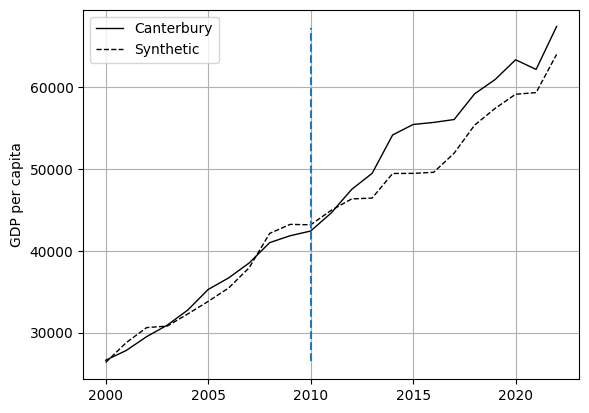

In [6]:
synth.path_plot(time_period=range(2000, 2023), treatment_time=2010)

The `gaps_plot` method shows the gaps (the difference between the treated unit and the synthetic control) over time.

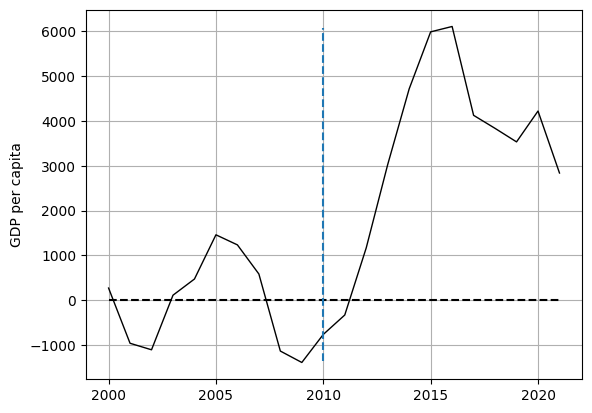

In [8]:
synth.gaps_plot(time_period=range(2000, 2022), treatment_time=2010)

Compute the average treatment effect on the treated unit (ATT) over the post-treatment time period, also returns a standard error (se).

In [ ]:
synth.att(time_period=range(1975, 1998))

{'att': -0.6995653768672561, 'se': 0.07078077988529438}

The summary function gives more information on the predictor values. The first column shows the value of the $V$ matrix for each predictor, the column 'treated' shows the mean value of each predictor for the treated unit over the time period `time_predictors_prior`, the column 'synthetic' shows the mean value of each predictor for the synthetic control over the time period `time_predictors_prior` and finally the column 'sample mean' shows the sample mean of that predictor for all control units over the time period `time_predictors_prior` i.e. this is the same as the synthetic control with all weights equal.

In [9]:
synth.summary()

,V,treated,synthetic,sample mean
Agriculture,0.059,0.056,0.086,0.086
Administrative and Support Services,0.059,0.020,0.015,0.015
Construction,0.059,0.055,0.054,0.054
Education and Training,0.059,0.045,0.043,0.043
Financial and Insurance Services,0.059,0.033,0.029,0.029
Food and beverage services,0.059,0.016,0.014,0.014
Health Care and Social Assistance,0.059,0.059,0.054,0.054
"Information Media, Telecommunications and Other Services",0.059,0.068,0.050,0.050
Manufacturing,0.059,0.153,0.149,0.149
"Professional, Scientific, and Technical Services",0.059,0.055,0.045,0.045


We can run a Placebo test using the `PlaceboTest` class. After instantiating it, we supply the original `Dataprep` object to it as well as a synthetic control method object (our `synth` from previously) and any options that we want to supply to the synthetic control method object (the optimisation scheme and starting point for the optimisation scheme).

In [ ]:
placebo_test = PlaceboTest()
placebo_test.fit(
    dataprep=dataprep,
    scm=synth,
    scm_options={"optim_method": "Nelder-Mead", "optim_initial": "equal"},
)

(1/17) Completed placebo test for Spain (Espana).
(2/17) Completed placebo test for Castilla-La Mancha.
(3/17) Completed placebo test for Cantabria.
(4/17) Completed placebo test for Principado De Asturias.
(5/17) Completed placebo test for Baleares (Islas).
(6/17) Completed placebo test for Canarias.
(7/17) Completed placebo test for Castilla Y Leon.
(8/17) Completed placebo test for Cataluna.
(9/17) Completed placebo test for Madrid (Comunidad De).
(10/17) Completed placebo test for Andalucia.
(11/17) Completed placebo test for Aragon.
(12/17) Completed placebo test for Extremadura.
(13/17) Completed placebo test for Comunidad Valenciana.
(14/17) Completed placebo test for Rioja (La).
(15/17) Completed placebo test for Murcia (Region de).
(16/17) Completed placebo test for Navarra (Comunidad Foral De).
(17/17) Completed placebo test for Galicia.
Calculating treated unit gaps.
Done.


We can plot the gaps for the treated unit as well as all the placebos in one graph using the `gaps_plot` method of the `PlaceboTest` class.

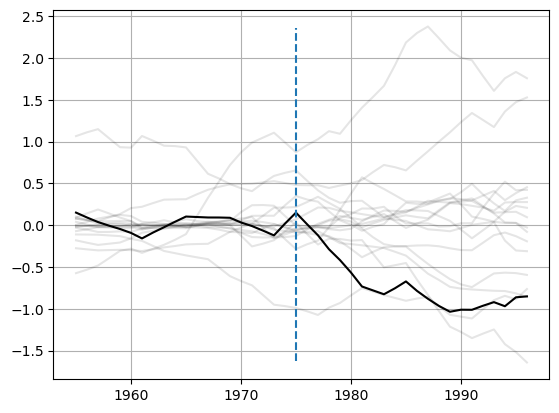

In [ ]:
placebo_test.gaps_plot(
    time_period=range(1955, 1998), treatment_time=1975, exclude_units=["Spain (Espana)"]
)

We can refine the gaps plot by removing those placebos that did not have a good pre-treatment match, namely we can remove from the plot any placebo whose pre-treatment mean-square prediction error is $> n\, \times $ the pre-treatment mean-square prediction error of the treated unit. The following graph is a refined version of the previous with $n=1$ (`mspe_threshold=1`).

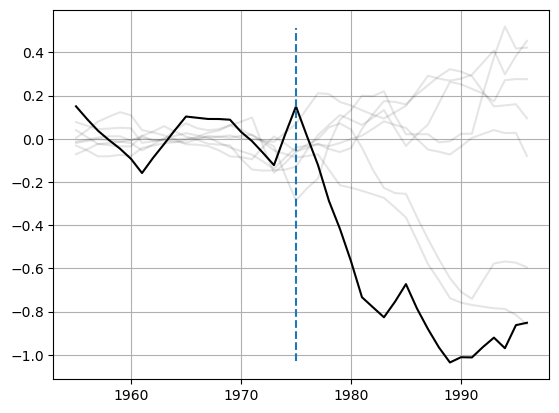

In [ ]:
placebo_test.gaps_plot(
    time_period=range(1955, 1998),
    treatment_time=1975,
    exclude_units=["Spain (Espana)"],
    mspe_threshold=1,
)

We calculate $p$-value of Abadie et al's version of Fisher's exact hypothesis test for no effect of treatment null using the `pvalue` method.

In [ ]:
placebo_test.pvalue(treatment_time=1975)

0.16666666666666666

We can calculate 95% confidence intervals for the treatment effect for the time periods $t=1976, 1977$. (For technical reasons involving permutation tests, we need to use all the pre-intervention time periods here rather than just the period 1960-1970 where the optimisation was carried out if we want a significance level of $\alpha=0.05$).

**(The following cell can take a while to run.)**

In [ ]:
synth.confidence_interval(
    alpha=0.05,
    time_periods=[1976, 1977],
    pre_periods=list(range(1955, 1975)),
    tol=0.01,
    verbose=False,
)

,value,lower_ci,upper_ci
time,,,
1976.0,0.012254,-0.167883,0.192392
1977.0,-0.121308,-0.301446,0.072103
